In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lap_tsne import LaplacianTSNE
from sklearn.manifold import TSNE

from sklearn.datasets import make_swiss_roll, load_digits # some small example datasets from sklearn

#### Load in dataset and define the tSNE objects

In [7]:
X, y = make_swiss_roll(500)
# X, y = load_digits(return_X_y=True)

## Laplacian tSNE

Extra parameters for ``LaplacianTSNE`` object:
* ``knn_graph``: the value of ``k`` for the k-nearest neighbor graph construction
* ``gl_kernel``: the kernel for determining the edge weights of the knn graph (either "gaussian" or "uniform")
* ``gl_normalization``: the normalization for the graph Laplacian (either "combinatorial" or "normalized")

__Notes__:
- ``learning_rate`` in the original ``TSNE`` object defaults to a relatively large value based on the perplexity parameter, but this is oftentimes too large for the Laplacian approximation. It needs to be chosen more carefully, and we can then change the instantiation code of the object to reflect this. But for now it defaults to what the original ``TSNE`` object does.
- The ``perplexity`` parameter is not currently used by the Laplacian approximation.
- We have specified ``verbose=2`` to print out more information throughout the training process. This allows us to see if/when the objective function values diverge (e.g., when the learning rate is too high).

In [5]:
models = {}
models['lap-sc'] = LaplacianTSNE(n_components=2, knn_graph=20, learning_rate=0.5, verbose=2)
models['lap-sc-ee'] = LaplacianTSNE(n_components=2, knn_graph=20, learning_rate=0.5, verbose=2, early_exaggeration=12.0)
models['lap-sc--lr'] = LaplacianTSNE(n_components=2, knn_graph=20, learning_rate=0.5, verbose=2, method='lowrank')
models['lap-pca'] = LaplacianTSNE(n_components=2, knn_graph=20, learning_rate=0.5, verbose=2, init="pca")
models['lap-pca--lr'] = LaplacianTSNE(n_components=2, knn_graph=20, learning_rate=0.5, verbose=2, init="pca", method="lowrank")
models['lap-pca-ee'] = LaplacianTSNE(n_components=2, knn_graph=20, learning_rate=0.5, verbose=2, init="pca", early_exaggeration=12.0)
models['orig'] = tsne = TSNE(n_components=2, method='exact')
models['bh'] = TSNE(n_components=2)

for modelname, model in models.items():
    print(modelname, model.init, model.early_exaggeration)


lap-sc sc 1.0
lap-sc-ee sc 12.0
lap-sc--lr sc 1.0
lap-pca pca 1.0
lap-pca-ee pca 12.0
orig pca 12.0
bh pca 12.0


CPU times: user 747 ms, sys: 4.7 s, total: 5.44 s
Wall time: 834 ms


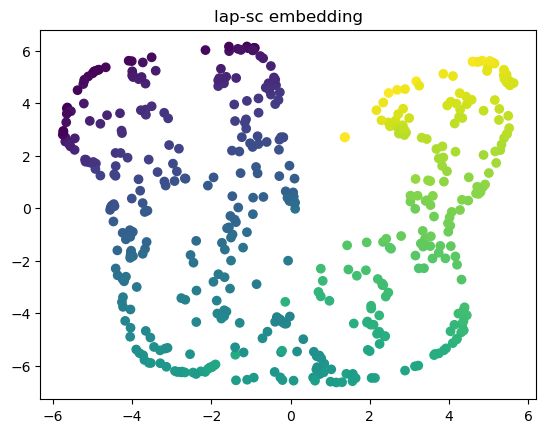

Part 2
CPU times: user 1.06 s, sys: 7.19 s, total: 8.26 s
Wall time: 1.22 s
Part 2


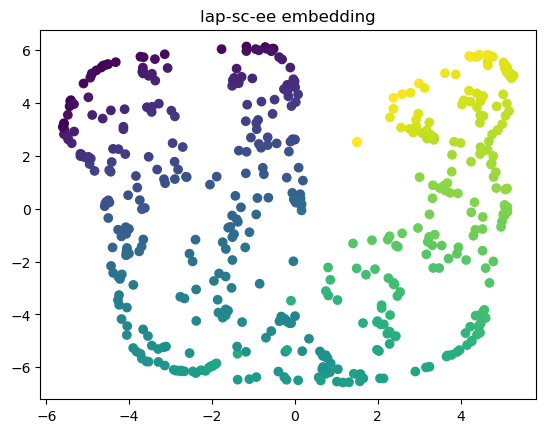

CPU times: user 541 ms, sys: 170 ms, total: 711 ms
Wall time: 377 ms


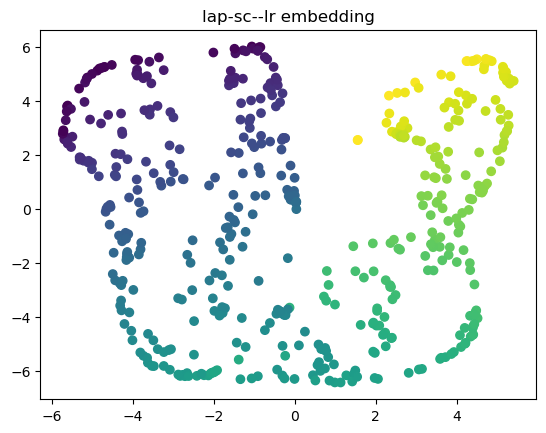

CPU times: user 784 ms, sys: 5.65 s, total: 6.43 s
Wall time: 876 ms


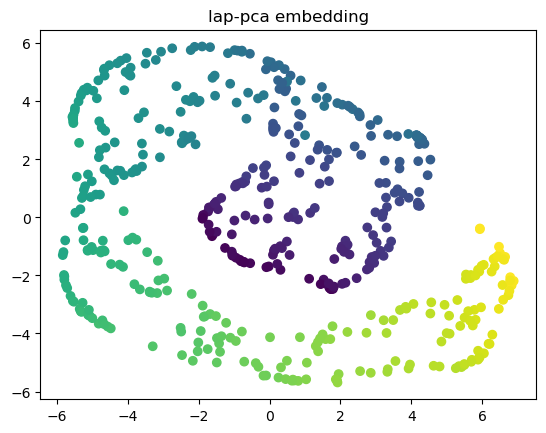

Part 2
CPU times: user 1.12 s, sys: 4.39 s, total: 5.52 s
Wall time: 980 ms
Part 2


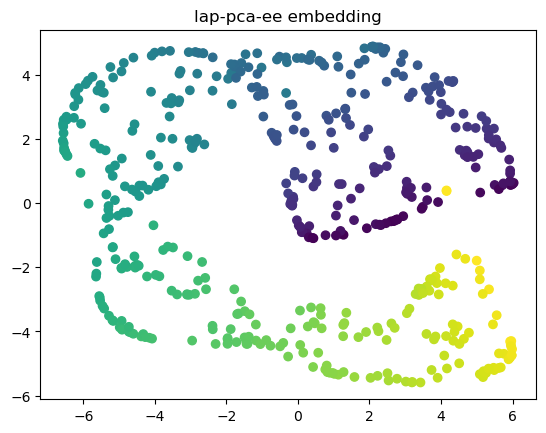

CPU times: user 2.54 s, sys: 17.4 ms, total: 2.56 s
Wall time: 2.55 s


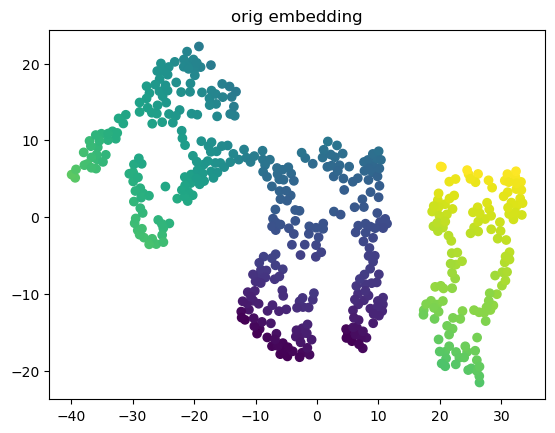

CPU times: user 710 ms, sys: 1.59 ms, total: 712 ms
Wall time: 715 ms


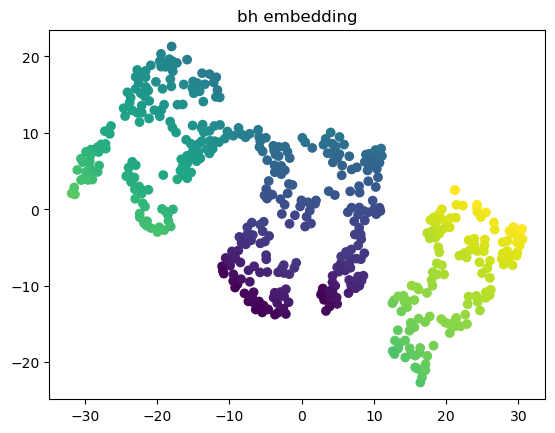

In [6]:
for modelname, model in models.items():
    #print(modelname)
    model.verbose = 0
    %time X_ = model.fit_transform(X)
    X_ = model.fit_transform(X)
    fig, ax = plt.subplots()
    ax.scatter(X_[:,0], X_[:,1], c=y)
    ax.set_title(f"{modelname} embedding")
    plt.show()
    

In [8]:
X, y = load_digits(return_X_y=True)

CPU times: user 13.3 s, sys: 19.8 s, total: 33.1 s
Wall time: 12.7 s


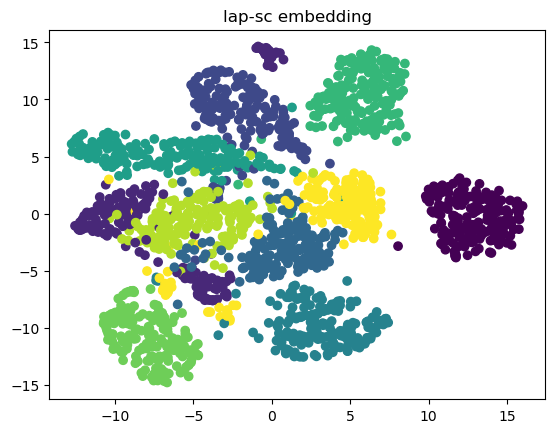

Part 2
CPU times: user 16 s, sys: 22.4 s, total: 38.4 s
Wall time: 15.1 s
Part 2


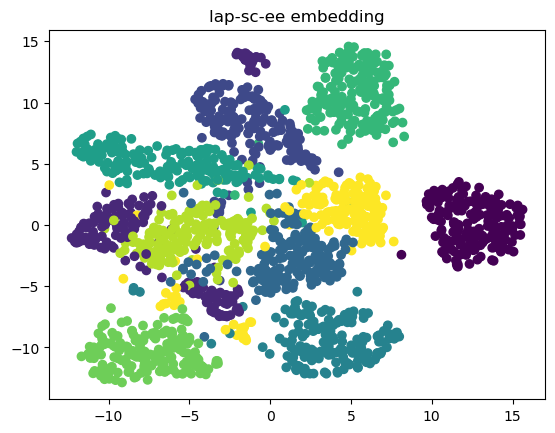

CPU times: user 2.47 s, sys: 593 ms, total: 3.07 s
Wall time: 1.4 s


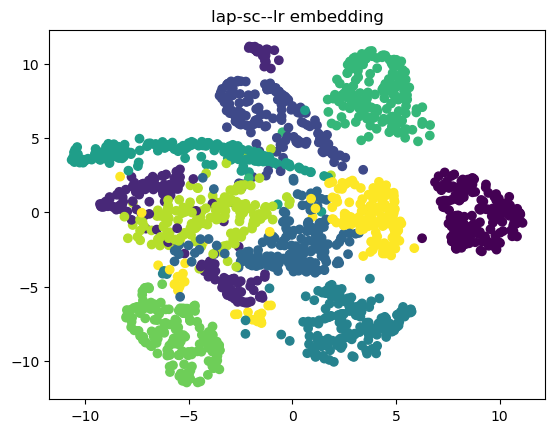

CPU times: user 14.7 s, sys: 22.3 s, total: 37 s
Wall time: 13.9 s


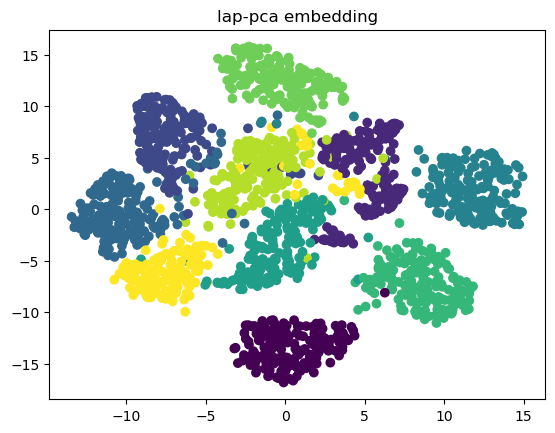

Part 2
CPU times: user 16.2 s, sys: 23.9 s, total: 40.1 s
Wall time: 15.2 s
Part 2


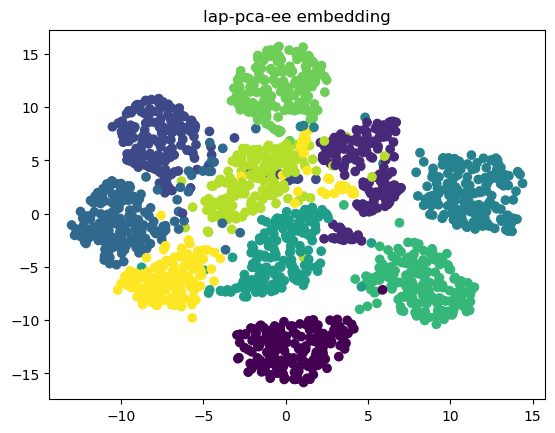

CPU times: user 5min 7s, sys: 5min 55s, total: 11min 3s
Wall time: 2min 22s


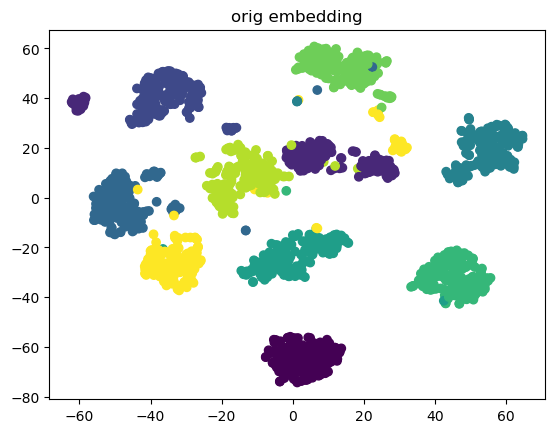

CPU times: user 3.78 s, sys: 0 ns, total: 3.78 s
Wall time: 3.67 s


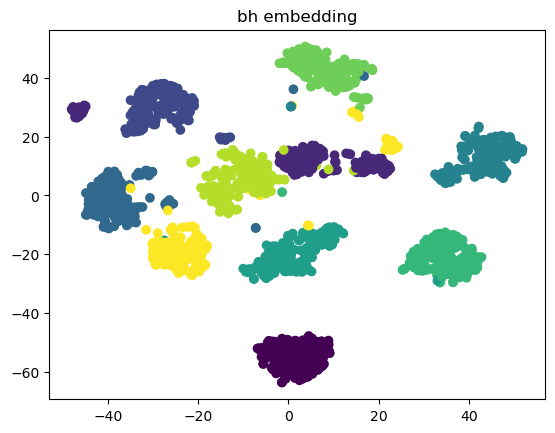

In [9]:
for modelname, model in models.items():
    #print(modelname)
    model.verbose = 0
    %time X_ = model.fit_transform(X)
    X_ = model.fit_transform(X)
    fig, ax = plt.subplots()
    ax.scatter(X_[:,0], X_[:,1], c=y)
    ax.set_title(f"{modelname} embedding")
    plt.show()

In [10]:
models['lap-pca--lr'] = LaplacianTSNE(n_components=2, knn_graph=20, learning_rate=0.5, verbose=2, init="pca", method="lowrank")

CPU times: user 2.8 s, sys: 389 ms, total: 3.19 s
Wall time: 1.36 s


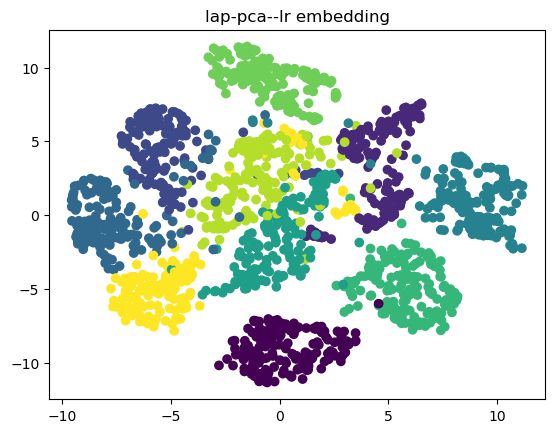

In [12]:
model = models['lap-pca--lr']
modelname = 'lap-pca--lr'
model.verbose = 0
%time X_ = model.fit_transform(X)
X_ = model.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X_[:,0], X_[:,1], c=y)
ax.set_title(f"{modelname} embedding")
plt.show()

In [13]:
print(X.shape)

(1797, 64)


## Code Todo

- Setup GitHub for this to send to Adam and Ryan
- where is the bottleneck?
- bh sklearn sparse approx of P_ij matrix
- min of 2 spectral gap  and the epsilon approximation

Lindermann package on GitHub?